# Comparison of UK and USA inflation and real interest rates (1989 - 2023)

### Data sources
UK inflation data source: https://www.ons.gov.uk/economy/inflationandpriceindices/timeseries/l55o/mm23

UK interest rate data source: https://www.bankofengland.co.uk/monetary-policy/the-interest-rate-bank-rate


USA inflation data source: https://data.bls.gov/timeseries/CUUR0000SA0L1E?output_view=pct_12mths

USA interest rate data source: https://fred.stlouisfed.org/series/FEDFUNDS

### Import necessary libraries and load raw data

In [35]:
# import packages for data manipulation and visualisation
import pandas as pd
import matplotlib.pyplot as plt
import os


# set project working directory from current working directory (cwd)
pwd = os.getcwd()

# load UK data (using pwd directory)
uk_inflation = pd.read_csv(pwd + "\\UK inflation ons_final.csv")

uk_interest = pd.read_csv(pwd + "\\UK interest rates boe_final.csv")

# load USA data
usa_inflation = pd.read_csv(pwd + "\\USA inflation_bls_final.csv")

usa_interest = pd.read_csv(pwd + "\\USA interest rate_fedfunds.csv")

### Produce data frame containing merged inflation and interest rates data in the UK

In [3]:
# ensure date columns are correct data type by converting to date-time, and removing extra 0's from time (.dt.normalize())
uk_inflation["Date"] = pd.to_datetime(uk_inflation["Date"], dayfirst=True).dt.normalize()
uk_interest["Date2"] = pd.to_datetime(uk_interest["Date2"], dayfirst=True).dt.normalize()

print(uk_interest.dtypes)

# merge unequal tables using .merge_asof()
uk_data = pd.merge_asof(uk_inflation, uk_interest, left_on="Date", right_on="Date2")

# finalise UK data frame
uk_data_clean = uk_data.iloc[:, [0, 1, 3]]

# inspect data
uk_data_clean

Date2          datetime64[ns]
UK_interest           float64
dtype: object


,Date,UK_inflation,UK_interest
0,1989-03-31,5.8,NaN
1,1989-06-30,5.8,13.8
2,1989-09-30,5.6,13.8
3,1989-12-31,5.7,14.9
4,1990-03-31,6.1,14.9
...,...,...,...
134,2022-09-30,8.7,2.3
135,2022-12-31,9.4,3.5
136,2023-03-31,9.0,4.3
137,2023-06-30,7.7,5.0


### Unpivot USA inflation data frame and create unified date column 

In [4]:
# unpivot inflation data to tall format and create concatenated date column
usa_inflation_tall = usa_inflation.melt(id_vars="Year",
                                  var_name="Month", value_name="USA_inflation")

# turn inflation Month column to int and sort data frame by Year and Month columns
usa_inflation_tall["Month"] = usa_inflation_tall["Month"].astype(int)
usa_inflation_sorted = usa_inflation_tall.sort_values(["Year", "Month"])

# create unified date column and set date type
usa_inflation_sorted["Date"] = usa_inflation_sorted["Year"].astype(str) + "-" + usa_inflation_sorted["Month"].astype(str) + "-" + "01"
usa_inflation_sorted["Date"] = pd.to_datetime(usa_inflation_sorted["Date"]).dt.normalize()

# reset inflation data frame indexes
usa_inflation_reset = usa_inflation_sorted.reset_index(drop=True)

# finalise USA inflation data frame by selecting key columns
usa_inflation_final = usa_inflation_reset.iloc[:, [3,2]]
print(usa_inflation_final.dtypes)

# inspect data
usa_inflation_final

Date             datetime64[ns]
USA_inflation           float64
dtype: object


,Date,USA_inflation
0,1989-01-01,4.6
1,1989-02-01,4.8
2,1989-03-01,4.7
3,1989-04-01,4.6
4,1989-05-01,4.6
...,...,...
415,2023-08-01,4.3
416,2023-09-01,4.1
417,2023-10-01,NaN
418,2023-11-01,NaN


### Produce data frame containing merged inflation and interest rates data in the USA

In [5]:
# ensure correct data types in USA interest table
usa_interest["Date"] = pd.to_datetime(usa_interest["Date"], dayfirst=True).dt.normalize()
print(usa_interest.dtypes)
                                    # no further manipulations required for USA interest rates data frame
    
# combine unequal inflation and interest data frames using .merge_asof()
usa_data = pd.merge_asof(usa_inflation_final, usa_interest, left_on="Date", right_on="Date")

# inspect data
usa_data

Date            datetime64[ns]
USA_interest           float64
dtype: object


,Date,USA_inflation,USA_interest
0,1989-01-01,4.6,NaN
1,1989-02-01,4.8,NaN
2,1989-03-01,4.7,NaN
3,1989-04-01,4.6,NaN
4,1989-05-01,4.6,NaN
...,...,...,...
415,2023-08-01,4.3,5.33
416,2023-09-01,4.1,5.33
417,2023-10-01,NaN,5.33
418,2023-11-01,NaN,5.33


### Produce final data frame combining all (UK & USA) data

In [6]:
# combine usa_data to uk_data_clean
data_comb = pd.merge_asof(usa_data, uk_data_clean, on="Date")

# add column dividing interest / inflation rates for both US and UK (ratio)
data_comb["UK interest ratio"] = (data_comb["UK_interest"] / data_comb["UK_inflation"]).round(2)
data_comb["USA interest ratio"] = (data_comb["USA_interest"] / data_comb["USA_inflation"]).round(2)

# finalise UK-US data frame
data_comb

,Date,USA_inflation,USA_interest,UK_inflation,UK_interest,UK interest ratio,USA interest ratio
0,1989-01-01,4.6,NaN,NaN,NaN,NaN,NaN
1,1989-02-01,4.8,NaN,NaN,NaN,NaN,NaN
2,1989-03-01,4.7,NaN,NaN,NaN,NaN,NaN
3,1989-04-01,4.6,NaN,5.8,NaN,NaN,NaN
4,1989-05-01,4.6,NaN,5.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...
415,2023-08-01,4.3,5.33,7.7,5.0,0.65,1.24
416,2023-09-01,4.1,5.33,7.7,5.0,0.65,1.30
417,2023-10-01,NaN,5.33,6.3,5.3,0.84,NaN
418,2023-11-01,NaN,5.33,6.3,5.3,0.84,NaN


### Generate summary UK & USA inflation vs interest rates subplot figure

<Figure size 640x480 with 0 Axes>

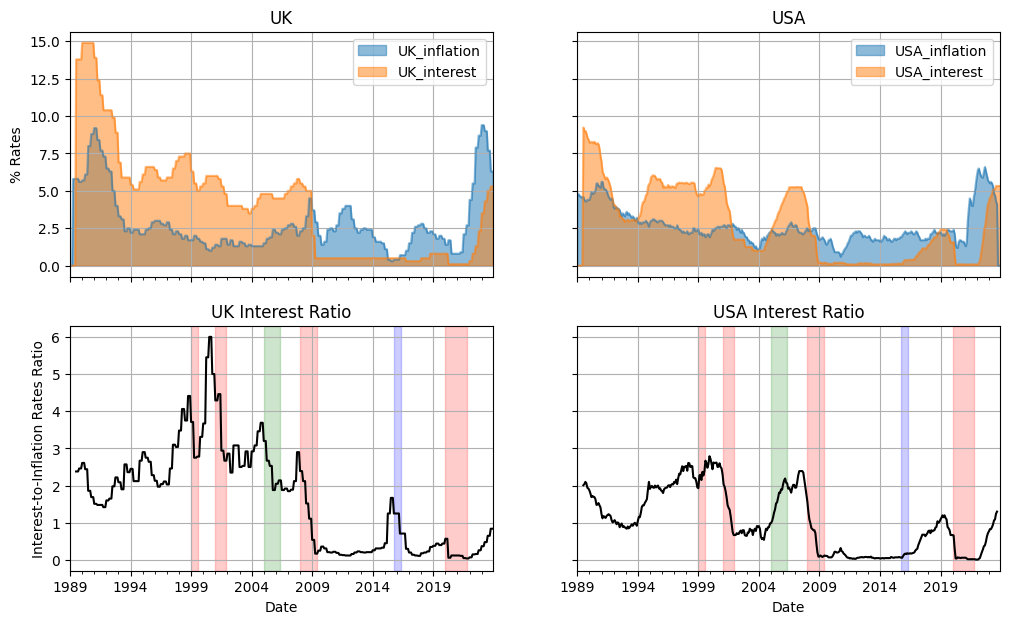

In [140]:
# create new figure
fig = plt.figure()
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2,2, figsize=(12, 7), sharey="row", sharex="col")

# inflation graphs (US & UK)
data_comb.plot.area(x="Date", y=["UK_inflation", "UK_interest"],  title="UK", ax=ax1, grid=True, xlabel="", stacked=False)
ax1.set_ylabel("% Rates")

data_comb.plot.area(x="Date", y=["USA_inflation", "USA_interest"],  title="USA", ax=ax2, grid=True, xlabel="", stacked=False)


# UK interest ratio graph
data_comb.plot(x="Date", y="UK interest ratio", title="UK Interest Ratio", kind="line", ax=ax3, legend = False, grid=True, color="black")
ax3.set_ylabel("Interest-to-Inflation Rates Ratio")

# include rough timings of recent economic crises on UK Interest ratio graph
ax3.axvspan("1999-01-01", "1999-08-31", color="red", alpha=0.2)
ax3.axvspan("2001-01-01", "2001-12-31", color="red", alpha=0.2)
ax3.axvspan("2005-01-01", "2006-05-15", color="green", alpha=0.2)
ax3.axvspan("2008-01-01", "2009-6-30", color="red", alpha=0.2)
ax3.axvspan("2015-10-01", "2016-05-15", color="blue", alpha=0.2)
ax3.axvspan("2020-01-01", "2021-10-31", color="red", alpha=0.2)


# USA interest ratio graph
data_comb.plot(x="Date", y="USA interest ratio", title="USA Interest Ratio", kind="line", ax=ax4, legend=False, grid=True, color="black")

# include rough timings of recent economic crises on USA Interest ratio graph
ax4.axvspan("1999-01-01", "1999-08-31", color="red", alpha=0.2)
ax4.axvspan("2001-01-01", "2001-12-31", color="red", alpha=0.2)
ax4.axvspan("2005-01-01", "2006-05-15", color="green", alpha=0.2)
ax4.axvspan("2008-01-01", "2009-6-30", color="red", alpha=0.2)
ax4.axvspan("2015-10-01", "2016-05-15", color="blue", alpha=0.2)
ax4.axvspan("2020-01-01", "2021-10-31", color="red", alpha=0.2)


# show figure
plt.show()

##### Interest rates rise again after a 14 year hyatus, while Interest-to-Inflation Ratio peaks mark incidence of global recessions
1. The 2008 crisis seems to have been a deciding moment in the management of UK & USA economies, as the regime switched to lower interest rates (both seen in the UK and USA with the post-2008 collapse of the orange area in top graphs), though we may today be seeing a reversal with interest rates above 5% for the foreseeable future.
2. Interest rate-to-Inflation rate ratio graphs (bottom, 'Interest Ratio') show similarly-timed peaks on both graphs (1998, 2000, 2007, 2019) apparently indicating impending economic recessions and/or broader turmoil (red shaded bands on bottom graphs).
3. Crises of the past 25 years:
 - 1999 *red* band: Market volatility resulting from risk contagion originating from the 1997 Asian Fianancial Crisis.
 - 2001 *red* band: Early 2000s Recession resulting from the boom of the 1990's, accompanied by both low inflation and low unemployment.
 - 2005 **green** band: Early manifestation of the US housing bubble (which would balloon again and help cause the subsequent 2008 sub-prime crisis). This mini crisis affected the USA primarily, where it was badly managed as interest rates were only barely lowered, leading to a resurging boom 2 years later, in 2008. In the UK, the same housing bubble was taken much more seriously, enacting an interest rates freeze in 2006 which lasted until the 2008 economic crisis, at which point the Treasury had no choice but to completely reduce interest rates to about 0.2-0.5%, where they would remain for the next decade.
 - 2008 *red* band: The Sub-Primes Mortgage Lending Crisis saw the collapse of Bear Sterns and Lheman Brothers leading to broader turmoil.
 - 2016 **blue** band: The UK votes for its exit from the European Union (BREXIT) manifesting a drastic fall in inflation and generating a local peak on the Interest-to-Inflation graph for the UK but not in the USA. Once again showing peaks correlate with crises relevant to the economy in question, as this crisis affected the UK but not the USA - mirrored by the corresponding lack of peak on the USA chart.
 - 2020 *red* band: COVID-19 spreads around the world, locking everyone indoors and all but killing the economy of most countries for up to a year.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Web scrape inflation data around the World 2022 and generate clean data frame

### Import Investor Sentiment, clean up data for analysis

In [132]:
# import requests for web scraping
import requests
import io


# Scrape data off website
url = requests.get("https://wisevoter.com/country-rankings/inflation-by-country/")

read = pd.read_html(io.StringIO(url.text))

# store in data frame and select columns
inflation_22 = pd.DataFrame(read[0])
inflation_data_22 = inflation_22.iloc[:, :3]

# clean up 'Inflation Rate (2022)' - remove '%'
inflation_data_22["Inflation_2022"] = inflation_data_22["Inflation Rate (2022)"].astype(str).str[:-1]
inflation_data_22["Inflation_2022"] = pd.to_numeric(inflation_data_22["Inflation_2022"])

# select data columns of interest
data_22 = inflation_data_22.iloc[1:, [1,3]]

# inspect data
data_22

,Country,Inflation_2022
1,Venezuela,210.00
2,Sudan,154.91
3,Turkey,73.13
4,Argentina,72.37
5,Sri Lanka,48.19
...,...,...
176,Brunei,2.50
177,People's Republic of China,2.17
178,Nauru,2.00
179,Japan,1.99


### Divide data in 2 for greater clarity of low and higher inflation readings across the World in 2022

In [133]:
# create first + second world countries data frame
    # sub-set data (rows) for countries with inflation < 12%
first_second_world = data_22[data_22["Inflation_2022"] < 12]


# copy data
f_s_world = first_second_world.copy()

# casting Country column as type string (from Object)
f_s_world["Country"] = first_second_world["Country"].astype(str)

# inspect data
f_s_world

,Country,Inflation_2022
44,Netherlands,11.98
45,Slovakia,11.94
46,Georgia,11.65
47,Chile,11.63
48,Serbia,11.46
...,...,...
176,Brunei,2.50
177,People's Republic of China,2.17
178,Nauru,2.00
179,Japan,1.99


<Figure size 640x480 with 0 Axes>

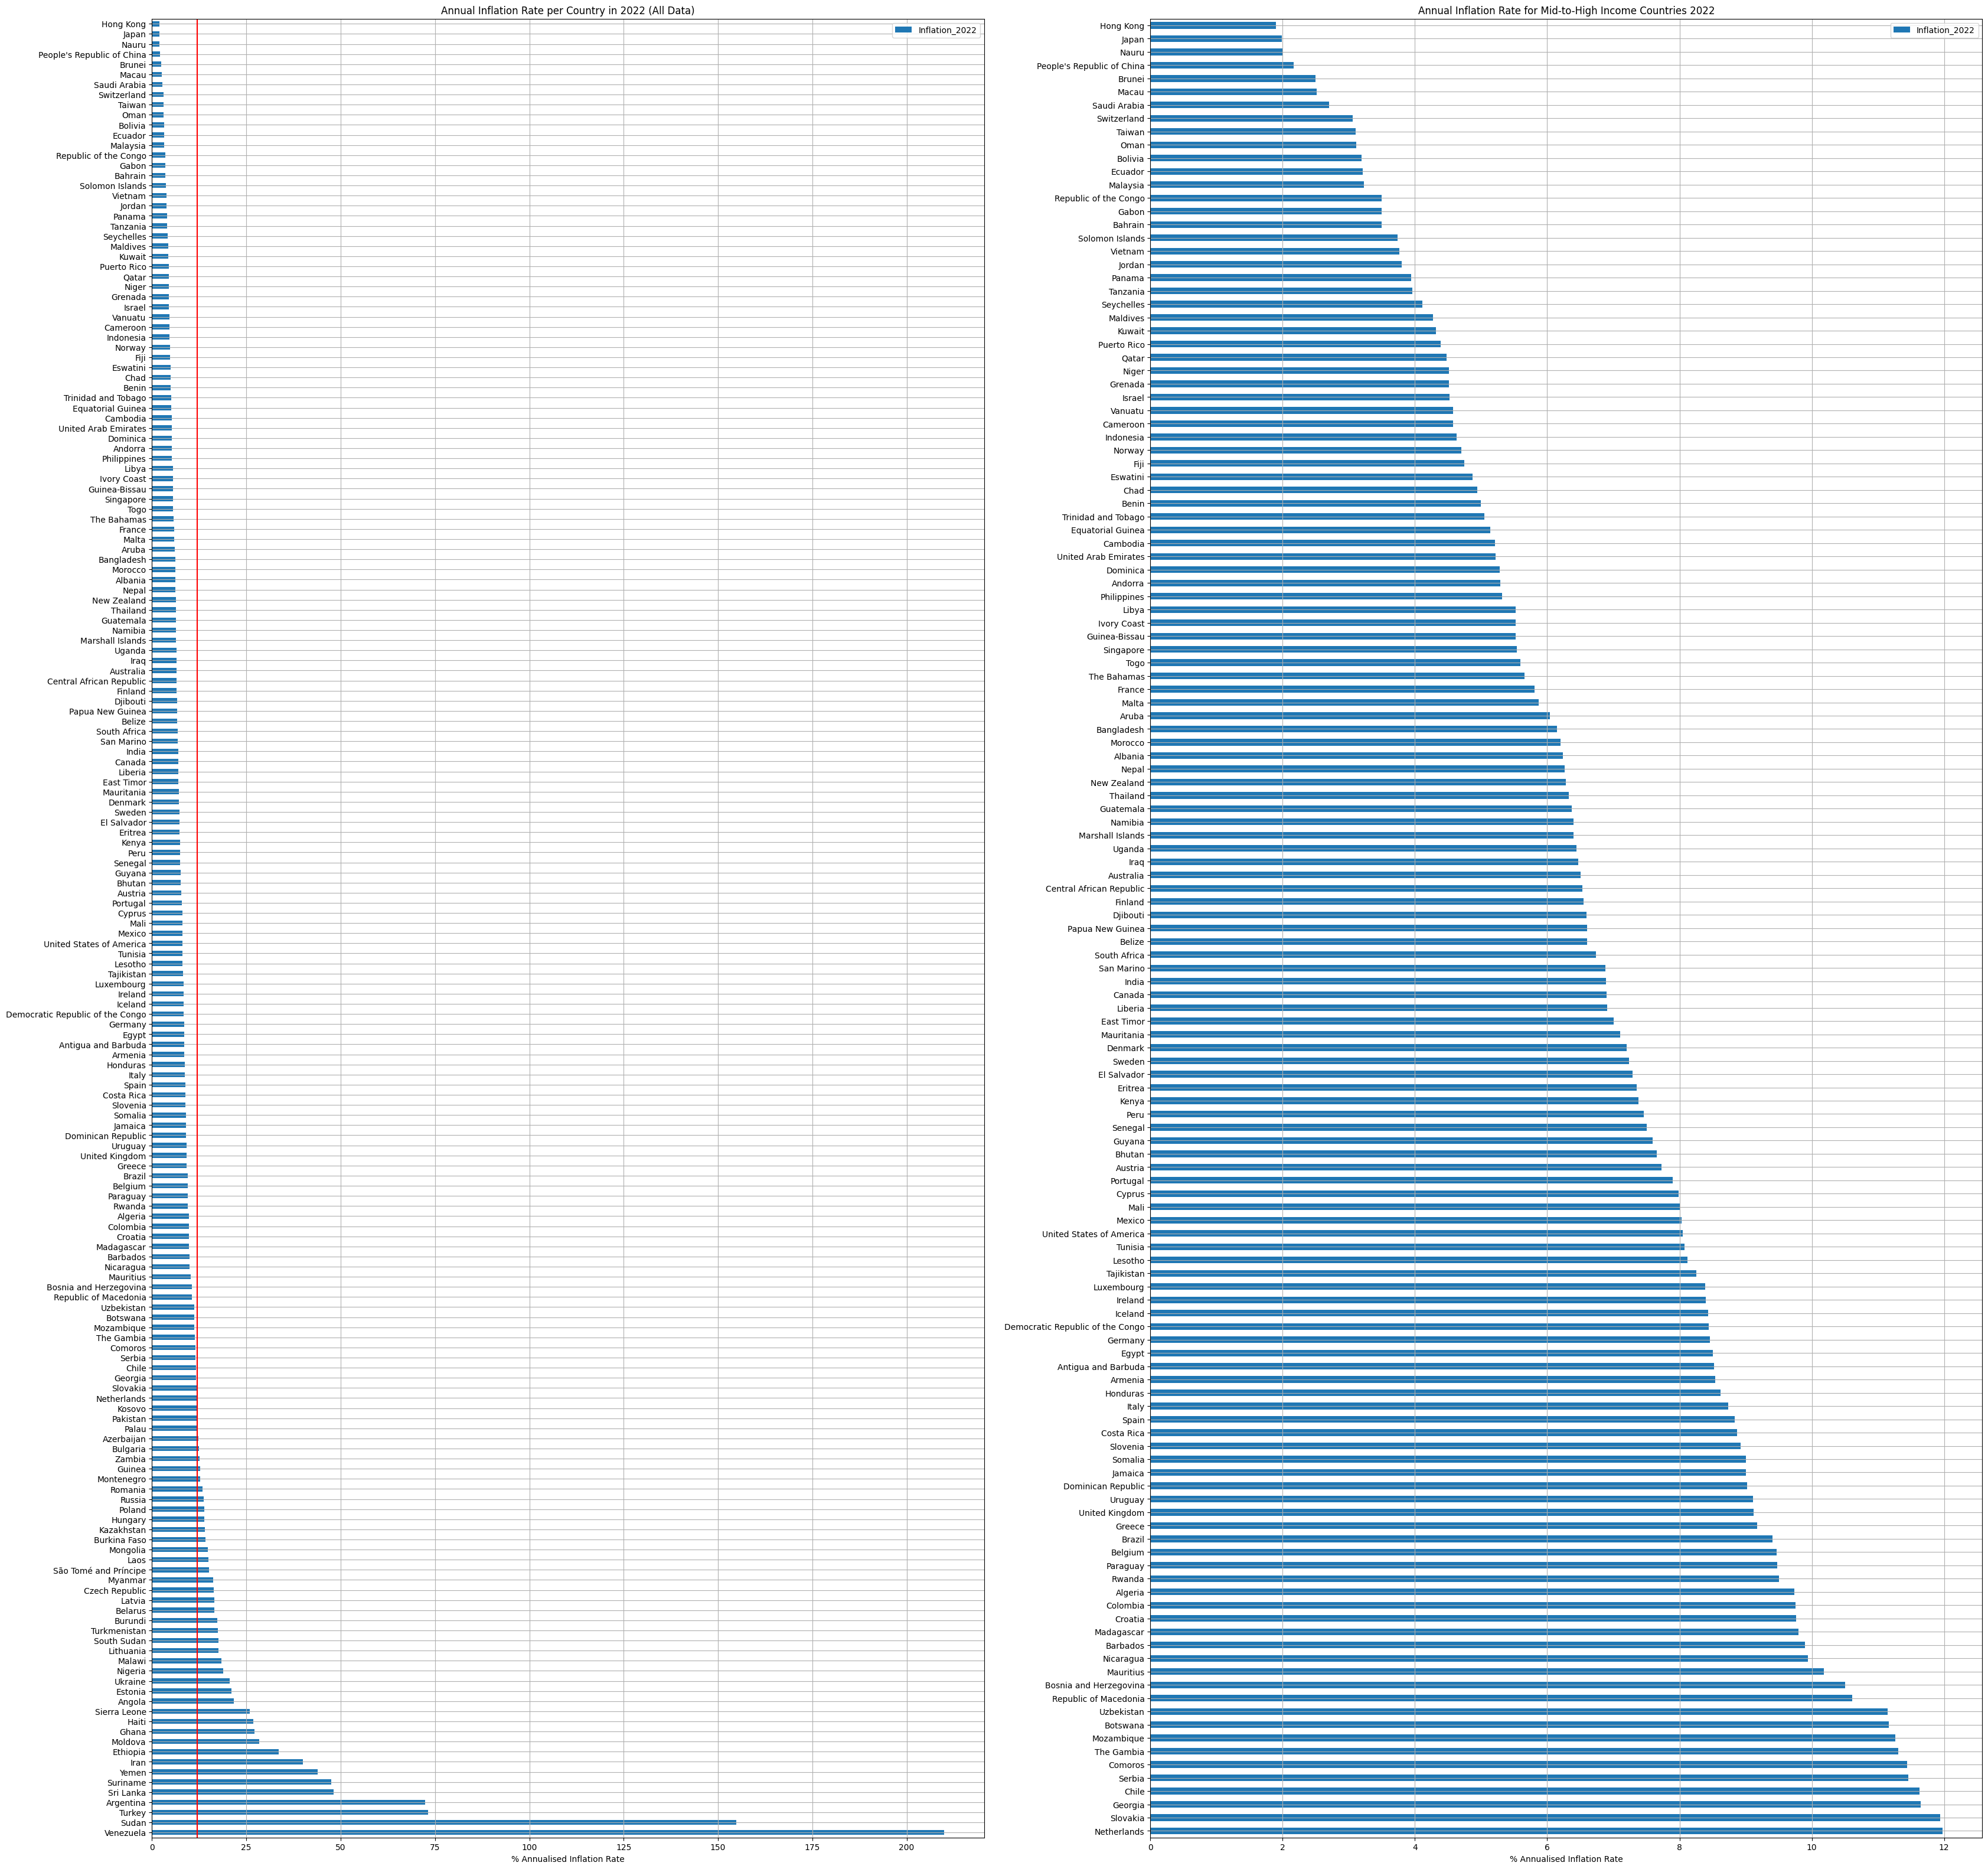

In [134]:
# create new figure
fig1 = plt.figure()
fig1, [ax5, ax6] = plt.subplots(1,2, figsize=(15, 35))

# create all data world inflation 2022 bar graph
ax0 = data_22.plot.barh(x="Country", y="Inflation_2022", ylabel="", 
                       title = "Annual Inflation Rate per Country in 2022 (All Data)",
                        ax=ax5, figsize=(35,35), grid=True)

# set x-label and add vertical line at 12% inflation    
ax5.set_xlabel("% Annualised Inflation Rate")
ax5.axvline(x=12, color='r', linestyle='-')

# create bar graph of countries with < 12% inflation
ax10 = first_second_world.plot.barh(x="Country", y="Inflation_2022", xlabel="% Annualised Inflation Rate", ylabel="",
                                  title = "Annual Inflation Rate for Mid-to-High Income Countries 2022",
                                  ax=ax6, figsize=(40,40), grid=True) 

# show figure
plt.show()


### Code heatmap of all countries inflation rates across world in 2022; including a hollistic map of the data as well as a more focused map comprising lower inflation countries (< 12% Inflation)

C:\Users\scott\AppData\Local\Temp\ipykernel_13880\3884360352.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


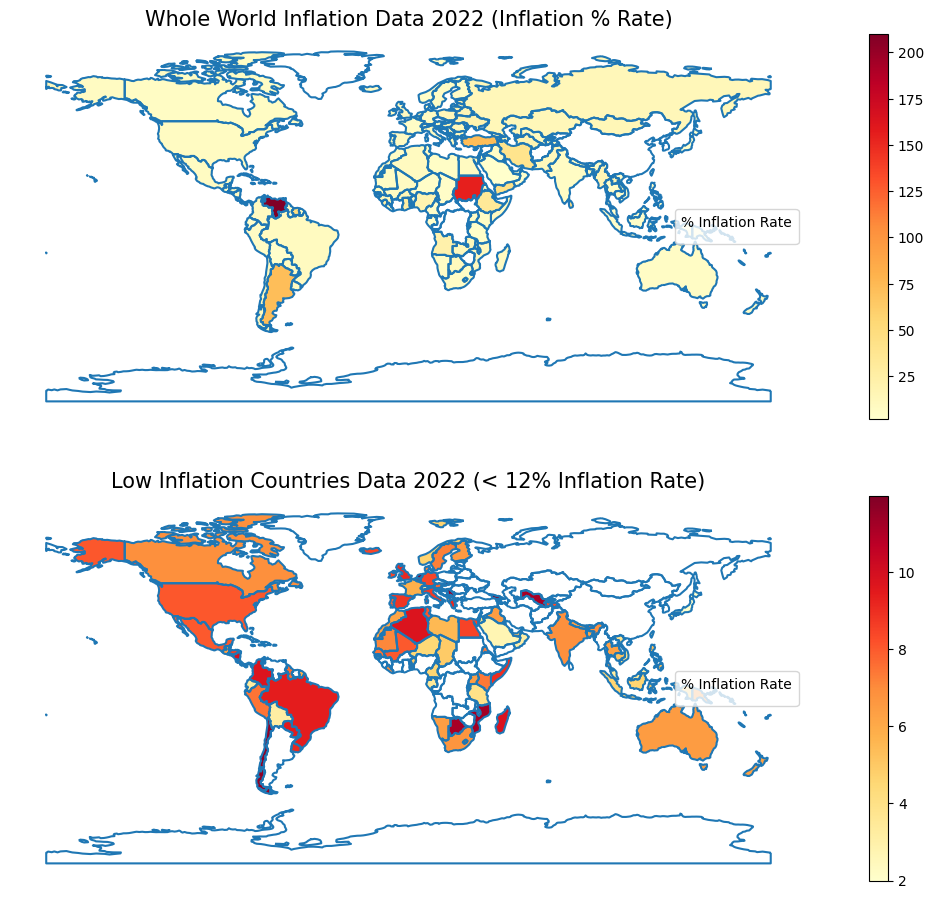

In [135]:
# import geopandas for heatmap construction
import geopandas as gpd


# load worldmap shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# merge world map with inflation data
world = world.merge(data_22, how='left', left_on='name', right_on='Country')
world2 = world.merge(f_s_world, how='left', left_on='name', right_on='Country')

# declare and select figure parameters
fig, [ax, ax1] = plt.subplots(2, 1, figsize=(16, 11))

# plot world maps
world.boundary.plot(ax=ax)
world2.boundary.plot(ax=ax1)

# plot whole world data on world map
ax = world.plot(column='Inflation_2022', cmap='YlOrRd', linewidth=0.1, ax=ax, edgecolor='0.8', legend=True)

# customize visual
ax.set_title('Whole World Inflation Data 2022 (Inflation % Rate)', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_axis_off()
ax.legend(title="% Inflation Rate", loc=5, fontsize="large")


# plot lower inflation countries data on world map
ax1 = world2.plot(column='Inflation_2022_y', cmap='YlOrRd', linewidth=0.1, ax=ax1, edgecolor='0.8', legend=True)

# customize visual
ax1.set_title('Low Inflation Countries Data 2022 (< 12% Inflation Rate)', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax1.set_axis_off()
ax1.legend(title="% Inflation Rate", loc=5, fontsize="large")

# show figure
plt.show()

## Comparison of Inflation & Interest Rates with Investor Sentiment in the USA

USA investor sentiment data source: https://www.aaii.com/sentimentsurvey/sent_results

Full report: https://advisor.visualcapitalist.com/30-years-of-investor-sentiment/

##### Data was pre-processed in Excell, where a single 'sentiment' ratio was calculated

- The AAII measures bullish/bearish sentiment by surveying the percentage of investors who think the stock market will be higher in six months.
- Initial calculation aimed at reducing the raw data's multiple values (from bulish and bearish % respondants on any single date) to a single representative metric.
- 'Bullish' (positive) investor sentiment was divided by 'Bearish' (negative) investor sentiment.
- The resulting ratio therefore represents the factor by which bullish sentiment equals the bearish sentiment.

        -- a ratio of 1.5 means the bullish sentiment is 1.5 times greater than the bearish sentiment (i.e. 60% bullish, 40% bearish).
    
        -- a ratio of 0.5 means the bullish sentiment is half that of the bearish sentiment (i.e. 33% bullish, 67% bearish).

### Import Investor Sentiment Data and Explore Data Structure

       Bullish-to-Bearish Sentiment
count                   1817.000000
mean                       1.422636
std                        0.864449
min                        0.190000
25%                        0.850000
50%                        1.230000
75%                        1.750000
max                        8.330000


,Date,Bullish-to-Bearish Sentiment
0,06/01/1989,1.13
1,13/01/1989,1.80
2,20/01/1989,2.12
3,27/01/1989,1.68
4,03/02/1989,1.43
...,...,...
1812,19/10/2023,0.98
1813,26/10/2023,0.68
1814,02/11/2023,0.48
1815,09/11/2023,1.57


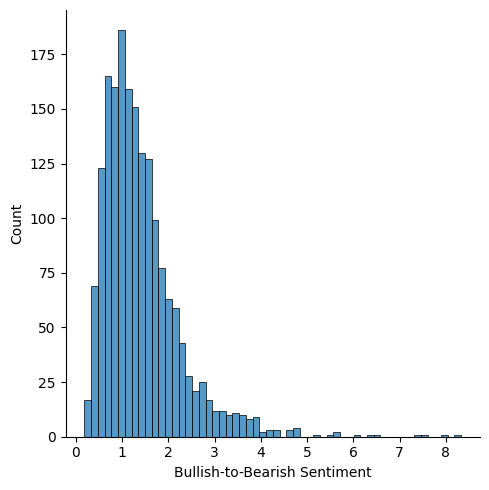

In [34]:
# import investor sentiment data
investor = pd.read_csv(pwd + "\\Investor_sentiment.csv")

# import seaborn library
import seaborn as sns

# inspect data visually
sns.displot(investor["Bullish-to-Bearish Sentiment"])

print(investor.describe())
investor

### Finalise Investor Sentiment Data Frame

In [13]:
# check investor sentiment data types
investor.dtypes

# copy data
investor_date = investor.copy()

# convert Date column to datetime
investor_date["date_time"] = pd.to_datetime(investor["Date"], dayfirst=True).dt.normalize()

# finalise investor data frame
investor_data = investor_date.iloc[:, [-1,1]]

investor_data

,date_time,Bullish-to-Bearish Sentiment
0,1989-01-06,1.13
1,1989-01-13,1.80
2,1989-01-20,2.12
3,1989-01-27,1.68
4,1989-02-03,1.43
...,...,...
1812,2023-10-19,0.98
1813,2023-10-26,0.68
1814,2023-11-02,0.48
1815,2023-11-09,1.57


### Calculate and Merge Investor Sentiment Monthly Average data frame with the unified UK interest rates data for graphical representations and analysis:

In [127]:
# merge sentiment ratio with inflation and interest rates data
merged_data = pd.merge_asof(investor_data, data_comb, left_on="date_time", right_on="Date")

# calculate monthly moving average of investor sentiment
ma = merged_data.groupby(pd.PeriodIndex(merged_data["date_time"], freq="M"))["Bullish-to-Bearish Sentiment"].mean().reset_index()

ma["date_month"] = ma["date_time"].astype(str) + "-15"
ma["date_month"] = pd.to_datetime(ma["date_month"]).dt.normalize()

# merge averaged investor sentiment column to merged data
infl_inter_investor = pd.merge_asof(merged_data, ma, left_on="date_time", 
                                    right_on="date_month", suffixes=["_d", "_ma"])

# select data of interest
infl_inter_investor_data = infl_inter_investor.iloc[:, [0,3,4,5,6,7,8,10]]

infl_inter_investor_data

,date_time_d,USA_inflation,USA_interest,UK_inflation,UK_interest,UK interest ratio,USA interest ratio,Bullish-to-Bearish Sentiment_ma
0,1989-01-06,4.6,NaN,NaN,NaN,NaN,NaN,NaN
1,1989-01-13,4.6,NaN,NaN,NaN,NaN,NaN,NaN
2,1989-01-20,4.6,NaN,NaN,NaN,NaN,NaN,1.682500
3,1989-01-27,4.6,NaN,NaN,NaN,NaN,NaN,1.682500
4,1989-02-03,4.8,NaN,NaN,NaN,NaN,NaN,1.682500
...,...,...,...,...,...,...,...,...
1812,2023-10-19,NaN,5.33,6.3,5.3,0.84,NaN,0.870000
1813,2023-10-26,NaN,5.33,6.3,5.3,0.84,NaN,0.870000
1814,2023-11-02,NaN,5.33,6.3,5.3,0.84,NaN,0.870000
1815,2023-11-09,NaN,5.33,6.3,5.3,0.84,NaN,0.870000


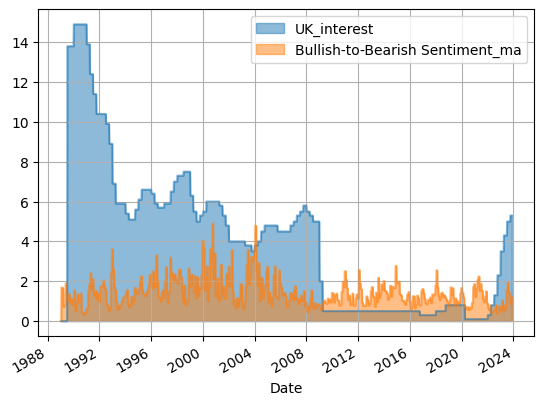

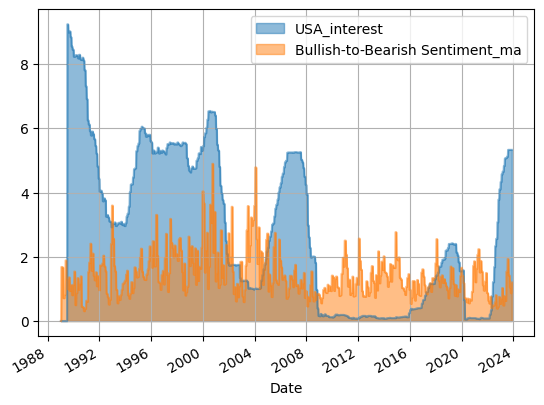

In [136]:
# Visualise data on graphs

# show UK results on a line graph
infl_inter_investor_data.plot.area(x="date_time_d", y=["UK_interest", 
                                                    "Bullish-to-Bearish Sentiment_ma"],
                                                    grid=True, xlabel="Date", stacked=False)

# show USA results on a line graph
infl_inter_investor_data.plot.area(x="date_time_d", y=["USA_interest", 
                                                    "Bullish-to-Bearish Sentiment_ma"],
                                                    grid=True, xlabel="Date", stacked=False)

# show graph
plt.show()